## **데이터셋 정보**
* Title: 작품의 제목
* Genre: 작품의 장르
* Premiere: 작품의 첫 방송일 or 개봉일
* Runtime: 작품의 총 상영 시간(분 단위)
* IMDB Score: IMDB에서의 사용자 평점(1~10점)
* Language: 작품의 주요 언어

In [1]:
import pandas as pd

df = pd.read_csv("./data/netflix_originals.csv", encoding="utf-8")

In [2]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


## **<장르 분리 전>**

## **데이터 전처리**

### **Premiere 데이터 형식 변경 & year/month/day/DayOfWeek 파생변수 생성**

In [4]:
df["Premiere"] = pd.to_datetime(df["Premiere"].str.replace(".", ",", regex=False), format="%B %d, %Y").dt.strftime("%Y-%m-%d")
df["Premiere"] = pd.to_datetime(df["Premiere"], format="%Y-%m-%d")

df["Premiere_year"] = df["Premiere"].dt.year
df["Premiere_month"] = df["Premiere"].dt.month
df["Premiere_day"] = df["Premiere"].dt.day
df["Premiere_DayOfWeek"] = df["Premiere"].dt.day_name()

df = df.drop(["Premiere"], axis=1)

### **Language의 count 파생변수 생성**

In [5]:
df["Language_count"] = df["Language"].apply(lambda x: len(x.split("/")))

In [6]:
df

,Title,Genre,Runtime,IMDB Score,Language,Premiere_year,Premiere_month,Premiere_day,Premiere_DayOfWeek,Language_count
0,Enter the Anime,Documentary,58,2.5,English/Japanese,2019,8,5,Monday,2
1,Dark Forces,Thriller,81,2.6,Spanish,2020,8,21,Friday,1
2,The App,Science fiction/Drama,79,2.6,Italian,2019,12,26,Thursday,1
3,The Open House,Horror thriller,94,3.2,English,2018,1,19,Friday,1
4,Kaali Khuhi,Mystery,90,3.4,Hindi,2020,10,30,Friday,1
...,...,...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,125,8.4,English,2018,12,31,Monday,1
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,91,8.4,English/Ukranian/Russian,2015,10,9,Friday,3
581,Springsteen on Broadway,One-man show,153,8.5,English,2018,12,16,Sunday,1
582,Emicida: AmarElo - It's All For Yesterday,Documentary,89,8.6,Portuguese,2020,12,8,Tuesday,1


## **데이터 EDA**

### **년/월/요일별 작품 개수**

In [7]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc

plt.rc("font", family = "Malgun Gothic")

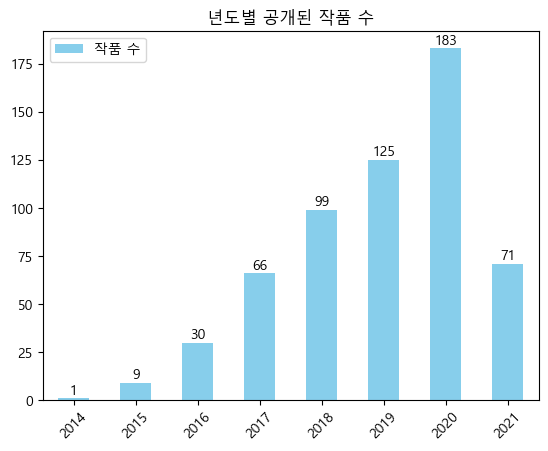

In [8]:
#년도별 공개된 작품 수
year_content_count = df.groupby(["Premiere_year"])["Title"].count()

ax = year_content_count.plot(
    kind="bar",
    color = "skyblue",
    label = "작품 수"
)

plt.title("년도별 공개된 작품 수")
plt.xlabel("")
_= plt.xticks(rotation = 45)
plt.legend()

for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", xytext=(0, 1), textcoords="offset points")

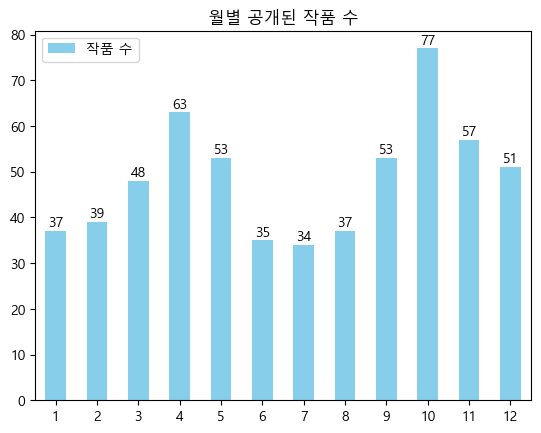

In [9]:
#월별 공개된 작품 수
year_content_count = df.groupby(["Premiere_month"])["Title"].count()

ax = year_content_count.plot(
    kind="bar",
    color = "skyblue",
    label = "작품 수"
)

plt.title("월별 공개된 작품 수")
plt.xlabel("")
_= plt.xticks(rotation = 0)
plt.legend()

for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", xytext=(0, 1), textcoords="offset points")

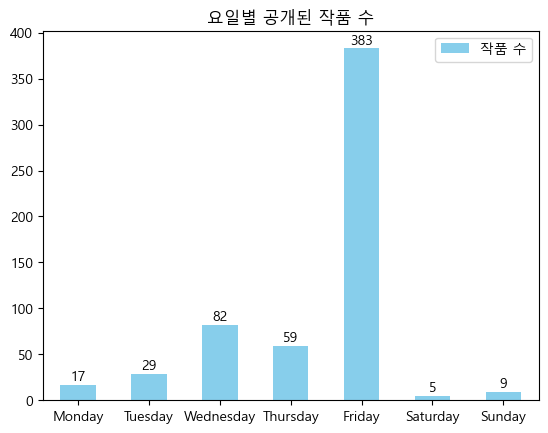

In [10]:
#요일별 공개된 작품 수
day_of_week_counts = df["Premiere_DayOfWeek"].value_counts()
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_of_week_counts = day_of_week_counts.reindex(ordered_days, fill_value=0)

ax = day_of_week_counts.plot(
    kind="bar",
    color="skyblue",
    label="작품 수"
)

plt.title("요일별 공개된 작품 수")
plt.xlabel("")
_= plt.xticks(rotation=0)
plt.legend()

for p in ax.patches:
    ax.annotate(
        str(p.get_height()), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha="center", va="bottom", xytext=(0, 1), textcoords="offset points")

### **IMDB Score와 Runtime 관계**

In [11]:
import seaborn as sns

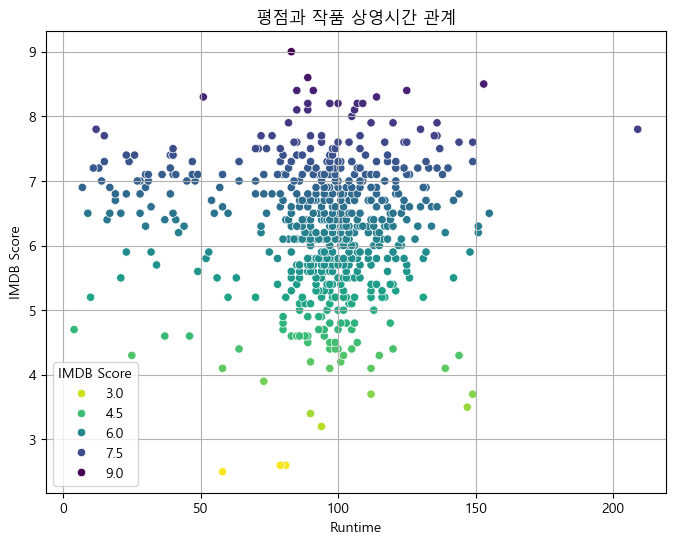

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Runtime", y="IMDB Score", hue="IMDB Score", palette="viridis_r", data=df)
plt.title("평점과 작품 상영시간 관계")
plt.xlabel("Runtime")
plt.ylabel("IMDB Score")
plt.grid(True)

plt.show()

### **IMDB Score와 Language의 관계**

C:\Users\ysh10\AppData\Local\Temp\ipykernel_13152\3740935328.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


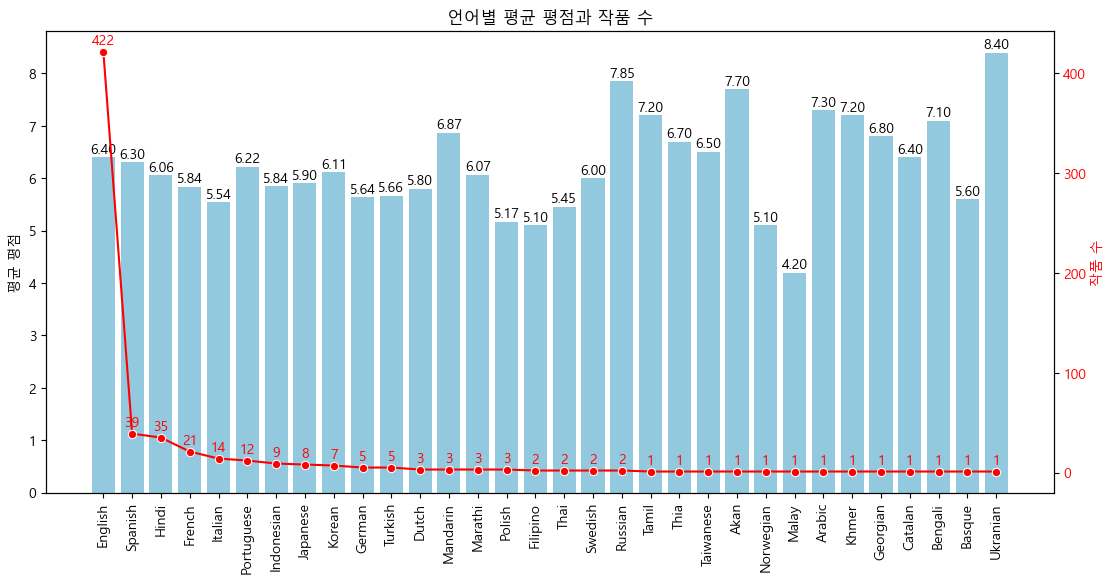

In [13]:
language_rows = []
for _, row in df.iterrows():
    for language in row["Language"].split("/"):
        language_rows.append({"Language": language, "IMDB Score": row["IMDB Score"]})

language_df = pd.DataFrame(language_rows)

# 언어별 평균 IMDB Score 및 작품 수 계산
mean_scores = language_df.groupby("Language")["IMDB Score"].mean().reset_index()
counts = language_df.groupby("Language").size().reset_index(name="Count")

# 평균 IMDB Score와 작품 수를 병합
mean_scores = mean_scores.merge(counts, on="Language")

# 작품 수 기준으로 내림차순 정렬
mean_scores = mean_scores.sort_values(by="Count", ascending=False)

plt.figure(figsize=(13, 6))

# IMDB Score 막대 그래프
ax1 = plt.subplot(111)
sns.barplot(x="Language", y="IMDB Score", data=mean_scores, color="skyblue", ax=ax1)
ax1.set_title("언어별 평균 평점과 작품 수")
ax1.set_ylabel("평균 평점")
ax1.set_xlabel("")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# 각 막대 위에 IMDB Score 값 표시
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), ".2f"), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha="center", va="bottom", xytext=(0, 1), textcoords="offset points")

# 작품 수를 보조 축으로 표현
ax2 = ax1.twinx()
sns.lineplot(x="Language", y="Count", data=mean_scores, color="red", marker="o", ax=ax2)
ax2.set_ylabel("작품 수", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# 각 선 위에 작품 수 값 표시
for x, y in enumerate(mean_scores["Count"]):
    ax2.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0, 5), ha="center", color="red")

plt.show()

### **각 컬럼 상관관계(IMDB Score, Runtime, Premiere_year, Premiere_month, Premiere_day, Premiere_DayOfWeek, Language_count)**

In [14]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_mapping = {day: idx for idx, day in enumerate(day_order)}
df["Premiere_DayOfWeek"] = df["Premiere_DayOfWeek"].map(day_mapping)

C:\Users\ysh10\AppData\Local\Temp\ipykernel_13152\687368039.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),
C:\Users\ysh10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot: >

C:\Users\ysh10\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\ysh10\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


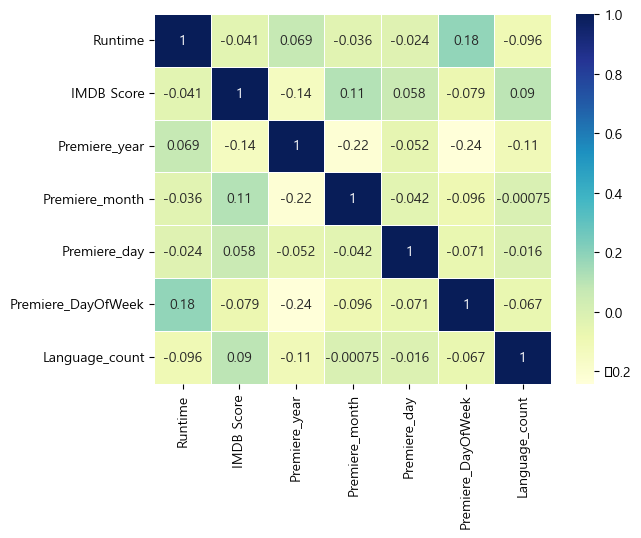

In [15]:
sns.heatmap(
    df.corr(),
    annot=True,
    linewidth=0.5,
    cmap="YlGnBu" 
)

## **<장르 분리 후>**

In [34]:
df = pd.read_csv("./data/netflix_preprocess.csv", encoding="utf-8")

In [35]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Genres
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,Documentary
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,Thriller
2,The App,SF,"December 26, 2019",79,2.6,Italian,SF
3,The App,Drama,"December 26, 2019",79,2.6,Italian,Drama
4,The Open House,Crime,"January 19, 2018",94,3.2,English,Crime
...,...,...,...,...,...,...,...
737,Taylor Swift: Reputation Stadium Tour,Concert,"December 31, 2018",125,8.4,English,Concert
738,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,Documentary
739,Springsteen on Broadway,One Man Show,"December 16, 2018",153,8.5,English,One Man Show
740,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,Documentary


## **데이터 EDA**

### **혼합 장르별 작품 개수**

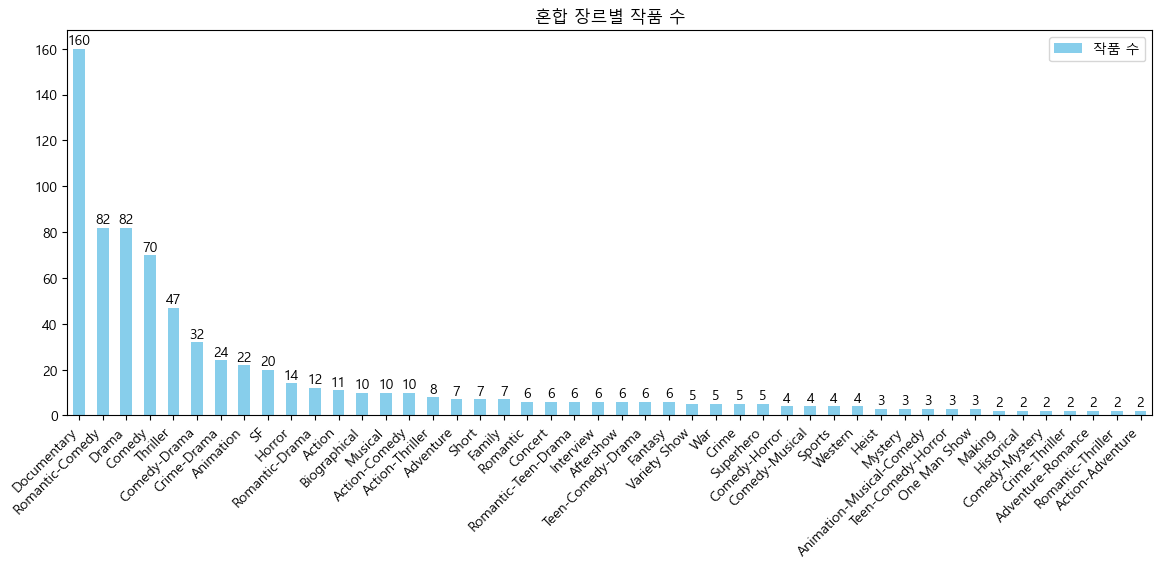

In [21]:
genre_count = df["Genre"].value_counts()

ax = genre_count.plot(
    kind = "bar",
    color = "skyblue",
    label = "작품 수",
    figsize = (14, 5)
)

plt.title("혼합 장르별 작품 수")
plt.xticks(rotation=45, ha="right")
plt.xlabel("")
plt.legend()

for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", xytext=(0, 1), textcoords="offset points")

### **혼합 장르별 평균 평점(장르가 매우 다양해서 작품 수 상위 10개의 장르와 평균 평점 표시)**

In [22]:
top_10_genres = df["Genre"].value_counts().head(10).index
filtered_df = df[df["Genre"].isin(top_10_genres)]

genre_IMDB_average = filtered_df.groupby("Genre")["IMDB Score"].mean().round(2)
genre_counts = filtered_df["Genre"].value_counts()

genre_stats = pd.DataFrame({
    "작품 수": genre_counts,
    "평균 평점": genre_IMDB_average
})

genre_stats = genre_stats.sort_values(by="작품 수", ascending=False)
genre_stats

,작품 수,평균 평점
Documentary,160,6.94
Drama,82,6.28
Romantic-Comedy,82,5.85
Comedy,70,5.72
Thriller,47,5.66
Comedy-Drama,32,6.28
Crime-Drama,24,6.71
Animation,22,6.60
SF,20,5.78
Horror,14,5.42


In [23]:
sorted_genres = genre_counts.sort_values(ascending=False).index
genre_counts = genre_counts.loc[sorted_genres]
genre_IMDB_average = genre_IMDB_average.loc[sorted_genres]

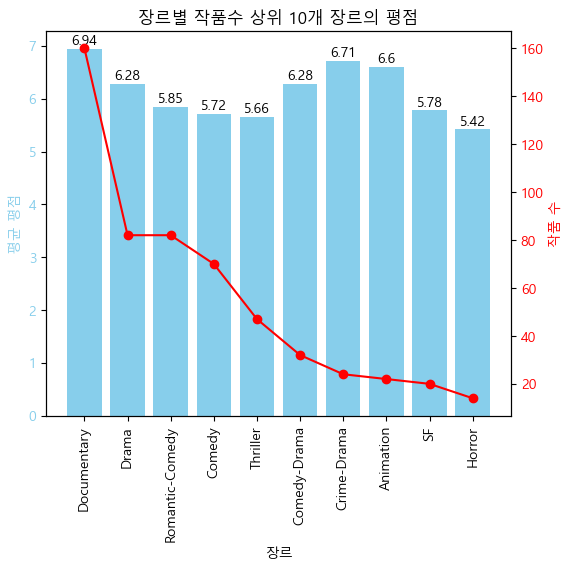

In [24]:
fig, ax1 = plt.subplots(figsize=(6, 5))

# 장르별 평균 평점 막대 그래프
ax1.bar(genre_IMDB_average.index, genre_IMDB_average, color="skyblue", label="평균 평점")
ax1.set_xlabel("장르")
ax1.set_ylabel("평균 평점", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")
ax1.set_title("장르별 작품수 상위 10개 장르의 평점")
plt.xticks(rotation=90)

for p in ax1.patches:
    ax1.annotate(str(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha="center", va="bottom", xytext=(0, 1), textcoords="offset points")

# 장르별 작품 수 꺾은선 그래프
ax2 = ax1.twinx()
ax2.plot(genre_counts.index, genre_counts, color="red", marker="o", linestyle="-", label="작품 수")
ax2.set_ylabel("작품 수", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.show()

### **주 장르별 작품 개수**

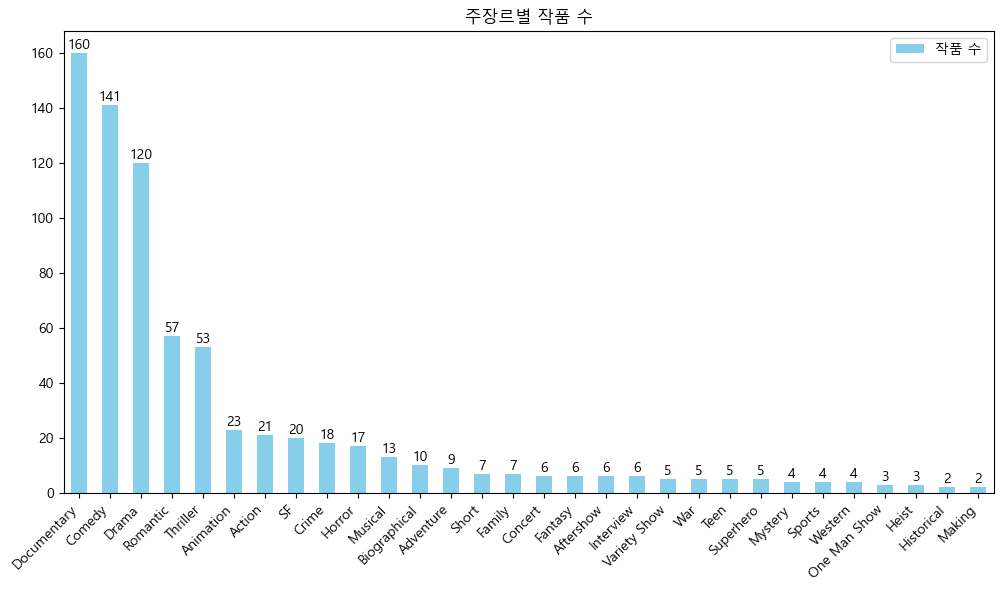

In [25]:
genres_count = df["Genres"].value_counts()

ax = genres_count.plot(
    kind = "bar",
    color = "skyblue",
    label = "작품 수",
    figsize = (12, 6)
)

plt.title("주장르별 작품 수")
plt.xticks(rotation=45, ha="right")
plt.xlabel("")
plt.legend()

for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", xytext=(0, 1), textcoords="offset points")

### **주 장르별 평균 평점**

In [26]:
genres_IMDB_average = df.groupby("Genres")["IMDB Score"].mean().round(2)
genres_counts = df["Genres"].value_counts()

genres_stats = pd.DataFrame({
    "작품 수": genres_counts,
    "평균 평점": genres_IMDB_average
})

genres_stats = genres_stats.sort_values(by="작품 수", ascending=False)
genres_stats

,작품 수,평균 평점
Documentary,160,6.94
Comedy,141,5.84
Drama,120,6.28
Romantic,57,5.90
Thriller,53,5.72
Animation,23,6.61
Action,21,5.76
SF,20,5.78
Crime,18,6.29
Horror,17,5.50


In [27]:
sorted_genres = genres_counts.sort_values(ascending=False).index
genres_counts = genres_counts.loc[sorted_genres]
genres_IMDB_average = genres_IMDB_average.loc[sorted_genres]

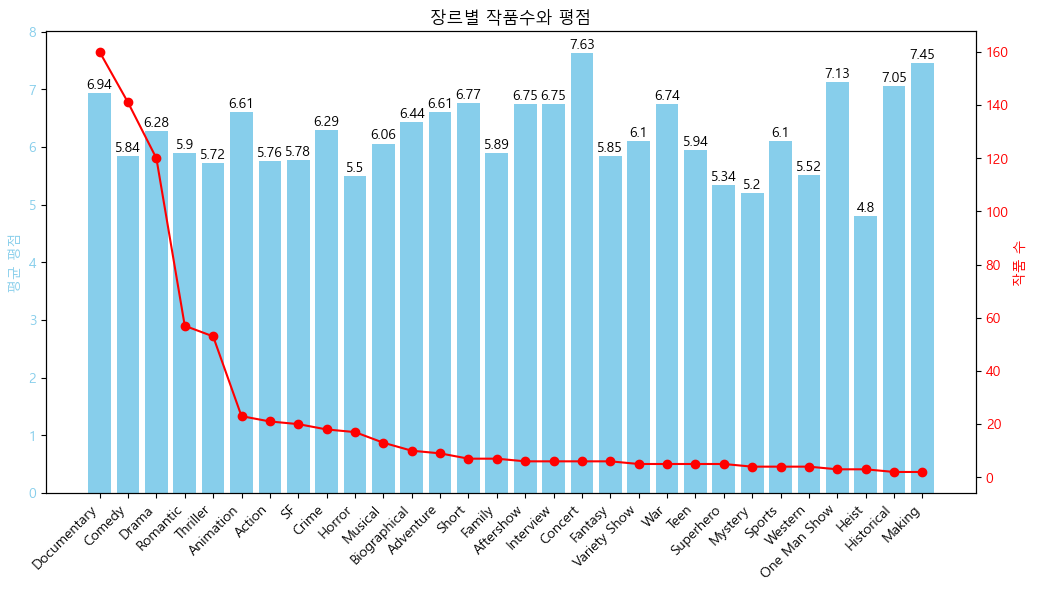

In [32]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# 장르별 평균 평점 막대 그래프
ax1.bar(genres_IMDB_average.index, genres_IMDB_average, color="skyblue", label="평균 평점")
ax1.set_xlabel("")
ax1.set_ylabel("평균 평점", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")
ax1.set_title("장르별 작품수와 평점")
plt.xticks(rotation=45, ha="right")

for p in ax1.patches:
    ax1.annotate(str(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha="center", va="bottom", xytext=(0, 1), textcoords="offset points")

# 장르별 작품 수 꺾은선 그래프
ax2 = ax1.twinx()
ax2.plot(genres_counts.index, genres_counts, color="red", marker="o", linestyle="-", label="작품 수")
ax2.set_ylabel("작품 수", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.show()

## **t-test 검정**

#### **1. 귀무 가설, 대립 가설, 유의 수준 설정**

* 귀무 가설: 두 장르의 평균 평점의 차는 0이다. ($H_{0}: \mu_{1}-\mu_{2}=0$)
* 대립 가설: 두 장르의 평균 평점의 차는 0이 아니다. ($H_{a}: \mu_{1}-\mu_{2}\neq0$)
* 유의 수준: 0.05

#### **2. 등분산 검정(levene test이용)**

* 귀무 가설: 두 집단의 모분산은 같다.
* 대립 가설: 두 집단의 모분산은 다르다.</br>
⇒ levene test 결과 p-value값이 0.05보다 크면 등분산 t통계량을 0.05보다 작으면 이분산 t통계량으로 계산

#### **3. t-test 수행**
* 등분산 가정 만족: equal_var=True
* 이분산 가정 만족: equal_var=False

### **Crime, Action 비교**
  - 때때로 Crime 장르에서는 범죄사건을 해결하는 과정에서 Action이 포함되어 있다.
  - 두 장르 모두 긴장감과 몰입도를 높인다.

In [29]:
from scipy import stats

# 데이터 준비
first_genre = df[df["Genres"] == "Crime"][["IMDB Score"]]
second_genre = df[df["Genres"] == "Action"][["IMDB Score"]]

# 등분산성 검정
statistic, p_value_levene = stats.levene(first_genre["IMDB Score"], second_genre["IMDB Score"])

# 등분산성 검정 결과 해석
if p_value_levene > 0.05:
    print(f"p-value: {p_value_levene} - 등분산 가정 만족")
else:
    print(f"p-value: {p_value_levene} - 이분산 가정 만족")

p-value: 0.834873364486038 - 등분산 가정 만족


In [30]:
t_statistics, p_value = stats.ttest_ind(
    a=first_genre,
    b=second_genre,
    alternative="two-sided", 
    equal_var=True 
)

if p_value >= 0.05:
    print(f"p_value가 {p_value}로 두 장르의 평균 평점에 차이가 없습니다.")
else:
    print(f"p_value가 {p_value}로 두 장르의 평균 평점에 차이가 있습니다.")

p_value가 [0.10844896]로 두 장르의 평균 평점에 차이가 없습니다.
